In [1]:
using Kinbiont
using DifferentialEquations
using OptimizationBBO
using NaNMath
using Plots
using Distributions

# examples from Genome-Scale Reconstruction of Microbial Dynamic Phenotype: Successes and Challenges
# Extremely High Proteins Concentration: Macromolecular Crowding
function enzyme_aggregation(du, u, param, t)
    e, x, y, m = u
    k1, k2, k3, k4, k_cat, n, e0 = param
    
    du[1] = k4 * x - k3 * m * e + k2 * y^n - k1 * e + k_cat * x  # Free active enzymes
    du[2] = k3 * m * e - k4 * x - k_cat * x                      # Enzyme-substrate complex
    du[3] = k1 * e - k2 * y^n                                    # Inactive aggregates
    du[4] = -du[1]                                              # Substrate degradation rate
end

enzyme_aggregation (generic function with 1 method)

In [2]:
u0 = [1.0, 0.1, 0.1, 1.0]  # Initial conditions [e, x, y, m]
param = [0.1, 0.1, 0.05, 0.05, 0.02, 2, 1.0]  # [k1, k2, k3, k4, k_cat, n, e0]

7-element Vector{Float64}:
 0.1
 0.1
 0.05
 0.05
 0.02
 2.0
 1.0

In [3]:
Simulation =  ODEs_system_sim(
    enzyme_aggregation, #string of the model
    u0, # starting condition
    0.0, # start time of the sim
    30.0, # final time of the sim
    1.0, # delta t for poisson approx
    param; # parameters of the ODE model
)

retcode: Success
Interpolation: 1st order linear
t: 31-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮
 19.0
 20.0
 21.0
 22.0
 23.0
 24.0
 25.0
 26.0
 27.0
 28.0
 29.0
 30.0
u: 31-element Vector{Vector{Float64}}:
 [1.0, 0.1, 0.1, 1.0]
 [0.8677678180248066, 0.14123240242957855, 0.1909997795456149, 1.1322321819751935]
 [0.7551884969912366, 0.1781656034426415, 0.26664589956612195, 1.2448115030087634]
 [0.6614140747339519, 0.2102082269315337, 0.32837769833451447, 1.3385859252660484]
 [0.5846743847594005, 0.23733681247013397, 0.37798880277046554, 1.4153256152405995]
 [0.5227573282631534, 0.2598839321616517, 0.417358739575195, 1.4772426717368468]
 [0.473359126014792, 0.2783679190101159, 0.448272954975092, 1.526640873985208]
 [0.4342854983358867, 0.2933749016006088, 0.4723396000635045, 1.5657145016641134]
 [0.40359010584309196, 0.3054781924920849, 0.49093170166482314, 1.596409894156908]
 [0.37959884474991745, 0.3152008957347756, 0.50

# Plot the data

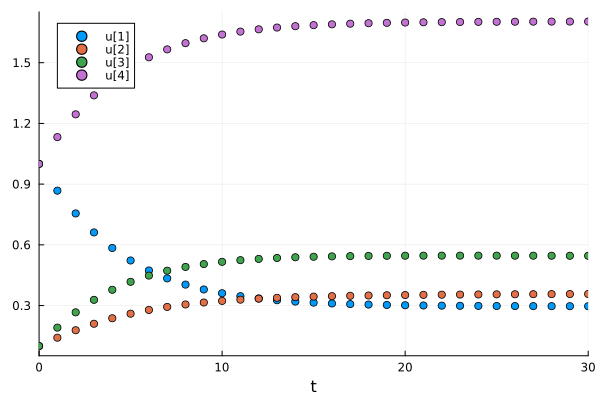

In [4]:
scatter(Simulation)

In [5]:
# Examples of structured model
function structured_model(du, u, param, t)
    s, x, m1, m2, m3, m4, p1, p2 = u
    qs, Y, v1, v2, v3, v4, v5 = param
    
    du[1] = -qs * u[2] * u[1]                                 # Extracellular substrate
    du[2] = Y * qs * u[2] * u[1]                                         # Cell mass
    du[3] = qs * x - v1 * x                                    # Intracellular metabolite M1
    du[4] = v1 * x - v2 * x - v4 * x                           # Intracellular metabolite M2
    du[5] = v2 * x - v3 * x                                    # Intracellular metabolite M3
    du[6] = v4 * x - v5 * x                                    # Intracellular metabolite M4
    du[7] = v3 * x                                             # Secreted product P1
    du[8] = v5 * x                                             # Secreted product P2
end

structured_model (generic function with 1 method)

In [6]:
u0_structured = [1.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0]  # Initial conditions for metabolism
param_structured = [0.1, 0.5, 0.05, 0.05, 0.02, 0.02, 0.01]  # Parameters for metabolism

7-element Vector{Float64}:
 0.1
 0.5
 0.05
 0.05
 0.02
 0.02
 0.01

In [7]:
Simulation =  ODEs_system_sim(
    structured_model, #string of the model
    u0_structured, # starting condition
    0.0, # start time of the sim
    50.0, # final time of the sim
    1.0, # delta t for poisson approx
    param_structured; # parameters of the ODE model
)

retcode: Success
Interpolation: 1st order linear
t: 51-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮
 39.0
 40.0
 41.0
 42.0
 43.0
 44.0
 45.0
 46.0
 47.0
 48.0
 49.0
 50.0
u: 51-element Vector{Vector{Float64}}:
 [1.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0]
 [0.9500416096269815, 0.5249791951865093, 0.12562474115781125, 0.08975010353687553, 0.11537484469468674, 0.10512494823156225, 0.010249896463124488, 0.005124948231562244]
 [0.9003318808728933, 0.5498340595635534, 0.1524958635514289, 0.07900165457942845, 0.13149751813085733, 0.11049917271028578, 0.020998345420571562, 0.010499172710285781]
 [0.851115069456945, 0.5744424652715275, 0.1806040355978388, 0.06775838576086449, 0.14836242135870328, 0.11612080711956776, 0.032241614239135526, 0.016120807119567763]
 [0.8026246881933597, 0.5986876559033202, 0.20993403595343205, 0.05602638561862719, 0.16596042157205926, 0.12198680719068641, 0.04397361438137283, 0.021986807190686415]
 [0.75508

# Plot the data

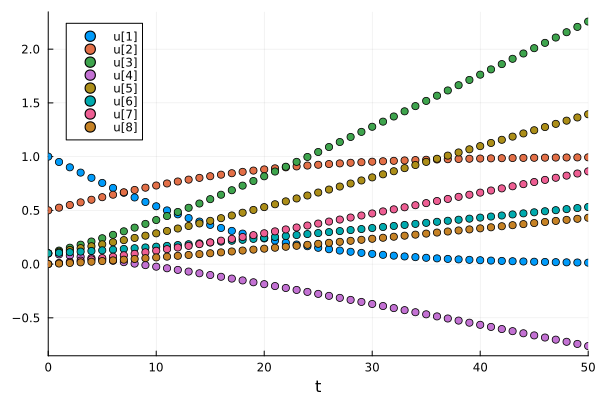

In [8]:
scatter(Simulation)

## From Baldazzi et al. eLife 2023;12:e79815. DOI: https://doi.org/10.7554/eLife.79815 Resource allocation accounts for the  large variability of rate- yield phenotypes    across bacterial strains

In [9]:
function ode_system_1(du, u, p, t)
    # Unpack variables
    C, U, Mu, R, Mc, Mer, Mef = u
    Vmc, Vmer, ρmef, Vmef, ρru, Vr, Vmu, γ, χu, χr, χc, χer, χef = p

    # Define the ODEs
    du[1] = Vmc - Vmer - ρmef * Vmef - ρru * (Vr + Vmu) - γ * C
    du[2] = Vmu - γ * U
    du[3] = χu * Vr - γ * Mu
    du[4] = χr * Vr - γ * R
    du[5] = χc * Vr - γ * Mc
    du[6] = χer * Vr - γ * Mer
    du[7] = χef * Vr - γ * Mef
end

ode_system_1 (generic function with 1 method)

In [10]:
u0 = [1.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.0]  # Initial conditions for metabolism
param = [0.1, 0.5, 0.05, 0.05, 0.02, 0.02, 0.01,0.1, 0.5, 0.05, 0.05, 0.02, 0.02, 0.0,0.1]  # Parameters for metabolism

15-element Vector{Float64}:
 0.1
 0.5
 0.05
 0.05
 0.02
 0.02
 0.01
 0.1
 0.5
 0.05
 0.05
 0.02
 0.02
 0.0
 0.1

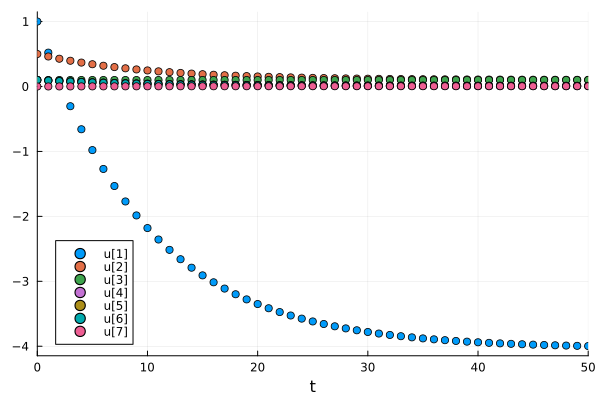

In [11]:
Simulation =  ODEs_system_sim(
    ode_system_1, #string of the model
    u0, # starting condition
    0.0, # start time of the sim
    50.0, # final time of the sim
    1.0, # delta t for poisson approx
    param; # parameters of the ODE model
)
scatter(Simulation)

In [12]:
function ode_system2(du, u, p, t)
    # Unpack variables
    c, u, mu, r, mc, mer, mef, a_star, a = u
    vmc, vmer, ρmef, vmef, ρru, vr, vmu, μ, γ, χu, χr, χc, χer, χef, nmer, nmef, nr, nmu, vd = p

    # Define the ODEs
    du[1] = vmc - vmer - ρmef * vmef - ρru * (vr + vmu) - (μ + γ) * c
    du[2] = vmu - (μ + γ) * u
    du[3] = χu * vr - (μ + γ) * mu
    du[4] = χr * vr - (μ + γ) * r
    du[5] = χc * vr - (μ + γ) * mc
    du[6] = χer * vr - (μ + γ) * mer
    du[7] = χef * vr - (μ + γ) * mef
    du[8] = nmer * vmer + nmef * vmef - nr * vr - nmu * vmu - vd
    du[9] = -nmer * vmer - nmef * vmef + nr * vr + nmu * vmu + vd
end

ode_system2 (generic function with 1 method)

In [14]:
# Initial conditions
u0 = [1.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0]  # Initial conditions for metabolism and energy

9-element Vector{Float64}:
 1.0
 0.5
 0.1
 0.1
 0.1
 0.1
 0.0
 0.0
 0.0

In [15]:
# Parameters
param = [0.1, 0.5, 0.05, 0.05, 0.02, 0.02, 0.01, 0.1, 0.1, 0.5, 0.05, 0.05, 0.02, 0.02, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1]

20-element Vector{Float64}:
 0.1
 0.5
 0.05
 0.05
 0.02
 0.02
 0.01
 0.1
 0.1
 0.5
 0.05
 0.05
 0.02
 0.02
 0.0
 0.1
 0.1
 0.1
 0.1
 0.1

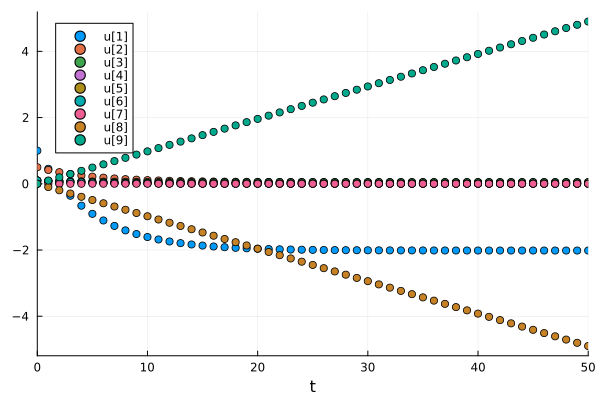

In [16]:
Simulation =  ODEs_system_sim(
    ode_system2, #string of the model
    u0, # starting condition
    0.0, # start time of the sim
    50.0, # final time of the sim
    1.0, # delta t for poisson approx
    param; # parameters of the ODE model
)
scatter(Simulation)

In [17]:
function vd(a_star, kd)
    return kd * a_star
end

vd (generic function with 1 method)

In [18]:
function vmc(mc)
    return 49.6 # Placeholder, replace with actual function if needed
end

vmc (generic function with 1 method)

In [19]:
function vmer(mer, c, a)
    return 4.6 # Placeholder, replace with actual function if needed
end

vmer (generic function with 1 method)

In [20]:
function vmef(mef, c, a)
    return 9.8 # Placeholder, replace with actual function if needed
end

vmef (generic function with 1 method)

In [21]:
function vr(r, c, a_star)
    return 19.2 # Placeholder, replace with actual function if needed
end

vr (generic function with 1 method)

In [22]:
function vmu(mu, c, a_star)
    return 6.5 # Placeholder, replace with actual function if needed
end

vmu (generic function with 1 method)

In [23]:
function ode_system4(du, u, p, t)
    # Unpack variables
    c, u, mu, r, mc, mer, mef, a_star, a = u
    kd, ρmef, ρru, γ, χu, χr, χc, χer, χef, nmer, nmef, nr, nmu, β = p

    # Calculate μ
    μ = β * (vmc(mc) - vmer(mer, c, a) - ρmef * vmef(mef, c, a) - (ρru - 1) * (vr(r, c, a_star) + vmu(mu, c, a_star))) - γ

    # Define the ODEs
    du[1] = vmc(mc) - vmer(mer, c, a) - ρmef * vmef(mef, c, a) - ρru * (vr(r, c, a_star) + vmu(mu, c, a_star)) - (μ + γ) * c
    du[2] = vmu(mu, c, a_star) - (μ + γ) * u
    du[3] = χu * vr(r, c, a_star) - (μ + γ) * mu
    du[4] = χr * vr(r, c, a_star) - (μ + γ) * r
    du[5] = χc * vr(r, c, a_star) - (μ + γ) * mc
    du[6] = χer * vr(r, c, a_star) - (μ + γ) * mer
    du[7] = χef * vr(r, c, a_star) - (μ + γ) * mef
    du[8] = nmer * vmer(mer, c, a) + nmef * vmef(mef, c, a) - nr * vr(r, c, a_star) - nmu * vmu(mu, c, a_star) - vd(a_star, kd)
    du[9] = -nmer * vmer(mer, c, a) - nmef * vmef(mef, c, a) + nr * vr(r, c, a_star) + nmu * vmu(mu, c, a_star) + vd(a_star, kd)
end

ode_system4 (generic function with 1 method)

In [24]:
# Initial conditions
u0 = [0.35, 10.2, 11.1, 13.2, 2.7, 1.9, 1.1, 0.009, 0.011]  # Initial conditions for metabolism and energy

9-element Vector{Float64}:
  0.35
 10.2
 11.1
 13.2
  2.7
  1.9
  1.1
  0.009
  0.011

In [25]:
# Parameters
param = [0.1, 0.05, 0.02, 0.027, 0.5, 0.05, 0.05, 0.02, 0.02, 0.1, 0.1, 0.1, 0.1, 40.65]

14-element Vector{Float64}:
  0.1
  0.05
  0.02
  0.027
  0.5
  0.05
  0.05
  0.02
  0.02
  0.1
  0.1
  0.1
  0.1
 40.65

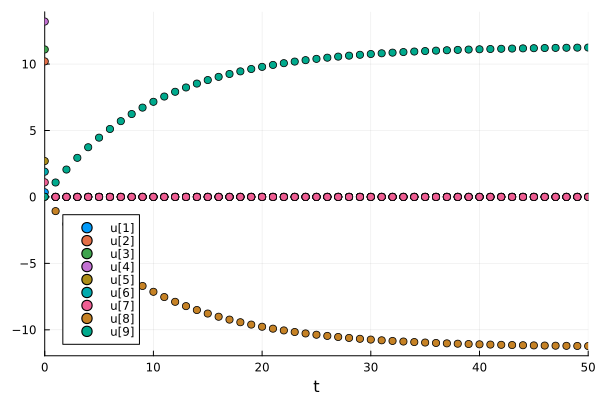

In [26]:
Simulation =  ODEs_system_sim(
    ode_system4, #string of the model
    u0, # starting condition
    0.0, # start time of the sim
    50.0, # final time of the sim
    1.0, # delta t for poisson approx
    param; # parameters of the ODE model
)
scatter(Simulation)

## from  A bacterial size law revealed by a coarse grained model of cell physiology

In [27]:
function ode_system5(du, u, p, t)
    # Unpack variables
    A, E, Ra, Q, X, U, Ri = u
    kE, fE, fR, kcm_on, kcm_off, fQ, fX, fU, s, asat = p

    # Define the ODEs
    du[1] = kE - s*Ra * A / (A + asat)
    du[2] = fE * s*Ra * A / (A + asat)
    du[3] = fR * s*Ra * A / (A + asat) - kcm_on * Ra + kcm_off * Ri
    du[4] = fQ * s*Ra * A / (A + asat)
    du[5] = fX * s*Ra * A / (A + asat)
    du[6] = fU * s*Ra * A / (A + asat)
    du[7] = kcm_on * Ra - kcm_off * Ri
end

ode_system5 (generic function with 1 method)

In [28]:
# Initial conditions
u0 = [1.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.0]  # Initial conditions for the variables

7-element Vector{Float64}:
 1.0
 0.5
 0.1
 0.1
 0.1
 0.1
 0.0

In [29]:
# Parameters
param = [0.1, 0.5, 0.05, 0.05, 0.02, 0.02, 0.01, 0.1, 0.5, 0.05]

10-element Vector{Float64}:
 0.1
 0.5
 0.05
 0.05
 0.02
 0.02
 0.01
 0.1
 0.5
 0.05

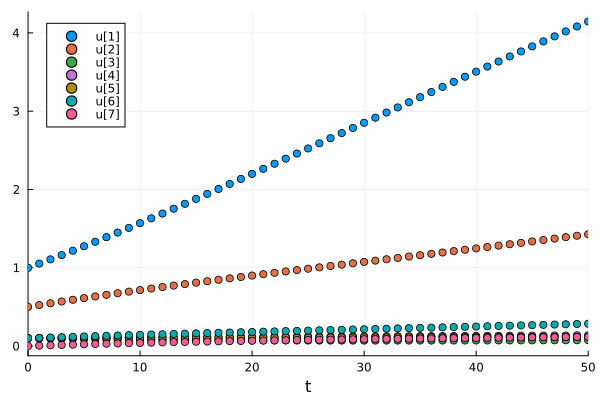

In [30]:
Simulation =  ODEs_system_sim(
    ode_system5, #string of the model
    u0, # starting condition
    0.0, # start time of the sim
    50.0, # final time of the sim
    1.0, # delta t for poisson approx
    param; # parameters of the ODE model
)
scatter(Simulation)

In [31]:
function Central_dogma(du, u, param, t)
    # Unpack variables
    DNA, RNA, P, nutrients = u
    yield, ktr, ktl, kdeg_RNA, kdeg_P  = param


    # Define the ODEs
    # du[1] ODE DNA replication using nutrients
    du[1] = + yield * DNA * nutrients
    # du[2] ODE rna dynamics
    du[2] = ktr * DNA - kdeg_RNA * RNA
    # du[3] protein translation
    du[3] = ktl * RNA - kdeg_P * P
    # nutrient consumption
    du[4] = -yield * DNA * nutrients
end

Central_dogma (generic function with 1 method)

In [32]:
u0 = [1.0, 0.0, 0.0,  1.1]  # Initial conditions for the variables

4-element Vector{Float64}:
 1.0
 0.0
 0.0
 1.1

In [33]:
# Parameters
param = [0.1, 0.05, 0.05, 0.05, 0.002, 0.002]

6-element Vector{Float64}:
 0.1
 0.05
 0.05
 0.05
 0.002
 0.002

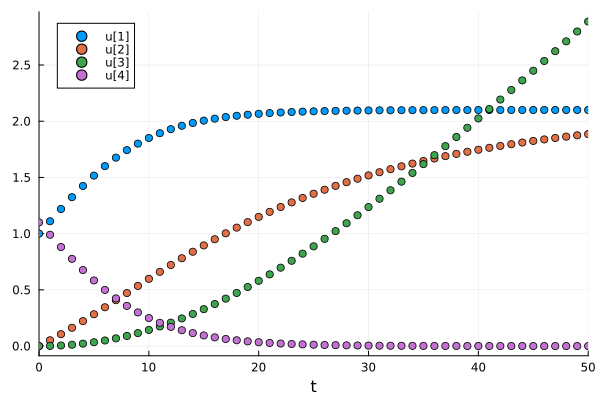

In [34]:
Simulation =  ODEs_system_sim(
    Central_dogma, #string of the model
    u0, # starting condition
    0.0, # start time of the sim
    50.0, # final time of the sim
    1.0, # delta t for poisson approx
    param; # parameters of the ODE model
)
scatter(Simulation)

# Concentration version 

In [35]:
function Central_dogma_with_ribo(du, u, param, t)
    # Unpack variables
    DNA, RNA, P, R, nutrients = u
    yield, ktr, ktl, kdeg_RNA, kdeg_P , R_size = param


    # Define the ODEs
    # du[1] ODE DNA replication using nutrients
    du[1] = + yield * DNA * nutrients
    # du[2] ODE rna dynamics
    du[2] = ktr * DNA - kdeg_RNA * RNA
    # du[3] protein translation
    du[3] = (1-R_size)  * ktl * R* RNA - (1-R_size)  * kdeg_P * P
    # du[4] ribosome dynamics   
    du[4] = R_size * ktl * R * RNA - R * kdeg_P
    # nutrient consumption
    du[5] = -yield * DNA * nutrients
end

Central_dogma_with_ribo (generic function with 1 method)

In [36]:
u0 = [0.2, 0.0, 0.0,  0.1,1.1]  # Initial conditions for the variables

5-element Vector{Float64}:
 0.2
 0.0
 0.0
 0.1
 1.1

In [37]:
# Parameters
param = [0.1, 0.05, 0.05, 0.002, 0.002, 0.6]

6-element Vector{Float64}:
 0.1
 0.05
 0.05
 0.002
 0.002
 0.6

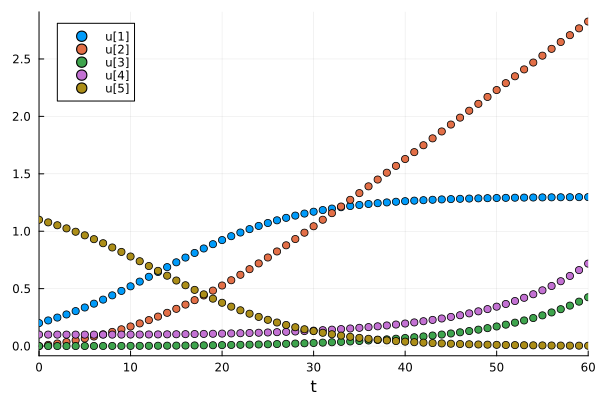

In [38]:
Simulation =  ODEs_system_sim(
    Central_dogma_with_ribo, #string of the model
    u0, # starting condition
    0.0, # start time of the sim
    60.0, # final time of the sim
    1.0, # delta t for poisson approx
    param; # parameters of the ODE model
)
scatter(Simulation)